In [100]:
import os
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [101]:
results = dict()

data_dir = "results"
for file_path in os.listdir(data_dir):
    with open(os.path.join(data_dir, file_path)) as f:
        results[file_path[:-5]] = json.load(f)

In [102]:
def get_result_table(statistic_name: str):
    tmp_dict = dict()
    problem_names=list()
    for name, data in results.items():
        problem_name, solver_name = name.split("-")
        if problem_name not in problem_names:
            problem_names.append(problem_name)
        if solver_name not in tmp_dict:
            tmp_dict[solver_name] = []
        tmp_dict[solver_name].append(data[statistic_name])
    return pd.DataFrame(tmp_dict, index=problem_names)

def get_result_table_average(statistic_name: str, solver_names: list=[]):
    tmp_dict = dict()
    problem_names=list()
    for name, data in results.items():
        problem_name, solver_name = name.split("-")
        if solver_names and solver_name not in solver_names:
            continue
        if problem_name not in problem_names:
            problem_names.append(problem_name)
        if solver_name not in tmp_dict:
            tmp_dict[solver_name] = []
        tmp_dict[solver_name].append(
            np.average([solution[statistic_name] for solution in data["solutions"]])
            )
    return pd.DataFrame(tmp_dict, index=problem_names)

def get_unaggregated_results(statistics_names: list, solver_name: str, problem_name: str):
    tmp_dict = {statistic_name: [] for statistic_name in statistics_names}
    for name, data in results.items():
        _problem_name, _solver_name = name.split("-")
        if _problem_name == problem_name and _solver_name == solver_name:
            for solution in data['solutions']:
                for statistic_name in statistics_names:
                    tmp_dict[statistic_name].append(solution[statistic_name])
    return pd.DataFrame(tmp_dict)


In [103]:
avg_times = get_result_table("avg_time")
avg_times.head()

,GreedySearchSolver,SimulatedAnnealingSolver,SteepestSearchSolver,TabuSearchSolver,VanillaTabuSearchSolver
bur26a,0.002487,0.130848,0.003466,0.074294,0.307427
chr12a,0.000129,0.026390,0.000157,0.047236,0.037026
chr22a,0.000868,0.111730,0.001327,0.122741,0.188818
els19,0.001138,0.062346,0.001958,0.055108,0.122318
esc32e,0.000419,0.054476,0.001266,0.032477,0.556756


In [104]:
avg_cost = get_result_table_average("cost")
avg_cost.head()

,GreedySearchSolver,SimulatedAnnealingSolver,SteepestSearchSolver,TabuSearchSolver,VanillaTabuSearchSolver
bur26a,5.445121e+06,5.435731e+06,5.444018e+06,5.437784e+06,5443445.2
chr12a,1.430268e+04,1.156771e+04,1.389021e+04,1.004979e+04,14344.8
chr22a,6.985760e+03,6.546143e+03,7.011614e+03,6.439067e+03,6975.0
els19,2.253350e+07,2.066616e+07,2.155716e+07,2.113546e+07,20813633.8
esc32e,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.0


In [105]:
optimum = get_result_table("optimal_cost")
avg_dist_to_optimum = avg_cost / optimum
avg_dist_to_optimum.head()

,GreedySearchSolver,SimulatedAnnealingSolver,SteepestSearchSolver,TabuSearchSolver,VanillaTabuSearchSolver
bur26a,1.003400,1.001670,1.003197,1.002048,1.003091
chr12a,1.497349,1.211025,1.454168,1.052113,1.501759
chr22a,1.134789,1.063376,1.138989,1.045982,1.133041
els19,1.309132,1.200645,1.252410,1.227910,1.209213
esc32e,1.000000,1.000000,1.000000,1.000000,1.000000


In [106]:
avg_evaluated_solutions = get_result_table_average("iteration_counts")
avg_evaluated_solutions.head()

,GreedySearchSolver,SimulatedAnnealingSolver,SteepestSearchSolver,TabuSearchSolver,VanillaTabuSearchSolver
bur26a,5637.625310,79848.200000,7203.640777,4834.941176,2021.200000
chr12a,370.679292,38256.804878,504.821997,3727.714286,2006.657143
chr22a,2205.953509,115319.000000,3383.213514,5465.066667,2013.500000
els19,3410.261876,54400.777778,2781.264706,3804.437500,2016.100000
esc32e,721.774958,1970.750000,2224.807062,2124.848485,2003.500000


In [107]:
avg_steps = get_result_table_average("step_count")
avg_steps.head()

,GreedySearchSolver,SimulatedAnnealingSolver,SteepestSearchSolver,TabuSearchSolver,VanillaTabuSearchSolver
bur26a,94.446650,0.0,21.165049,4343.941176,2021.200000
chr12a,14.166753,0.0,6.648818,3727.714286,2006.657143
chr22a,34.864035,0.0,13.645946,4423.000000,2013.500000
els19,55.554202,0.0,15.264706,3317.562500,2016.100000
esc32e,6.250000,0.0,3.485498,2017.393939,2003.500000


In [108]:
avg_steps = get_result_table_average("step_count")
problem_order = sorted(avg_steps.index, key=lambda x: int(''.join(filter(str.isdigit, x))))

In [109]:
def get_result_table_with_std(statistic_name: str):
    """Get mean and std of a statistic across solutions for each solver and problem"""
    means = dict()
    stds = dict()
    problem_names = []
    
    for name, data in results.items():
        problem_name, solver_name = name.split("-")
        if problem_name not in problem_names:
            problem_names.append(problem_name)
        if solver_name not in means:
            means[solver_name] = []
            stds[solver_name] = []
            
        values = [solution[statistic_name] for solution in data["solutions"]]
        means[solver_name].append(np.mean(values))
        stds[solver_name].append(np.std(values))
        
    return pd.DataFrame(means, index=problem_names), pd.DataFrame(stds, index=problem_names)

In [110]:
import matplotlib.pyplot as plt

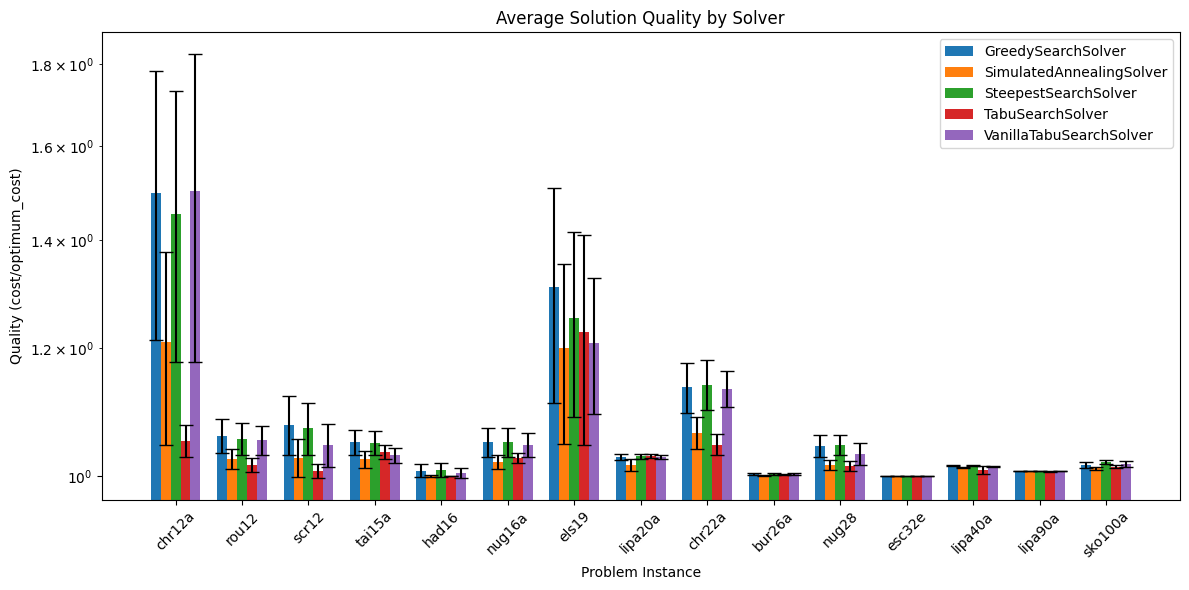

In [111]:
means_cost, stds_cost = get_result_table_with_std("cost")
optimum = get_result_table("optimal_cost")
quality_means = means_cost / optimum
quality_stds = stds_cost / optimum

plt.figure(figsize=(12, 6))
bar_width = 0.15
index = np.arange(len(quality_means.index))

quality_means = quality_means.reindex(problem_order) 
quality_stds = quality_stds.reindex(problem_order) 

for i, solver in enumerate(quality_means.columns):
    plt.bar(index + i * bar_width, 
            quality_means[solver], 
            bar_width,
            yerr=quality_stds[solver],
            label=solver,
            capsize=5)

plt.xlabel('Problem Instance')
plt.ylabel('Quality (cost/optimum_cost)')
plt.title('Average Solution Quality by Solver')
plt.xticks(index + bar_width * 2, quality_means.index, rotation=45)
plt.yscale('log')
plt.legend()
plt.tight_layout()
plt.savefig("plots/quality_by_solver_extra_solvers.pdf", format='pdf')
plt.show()

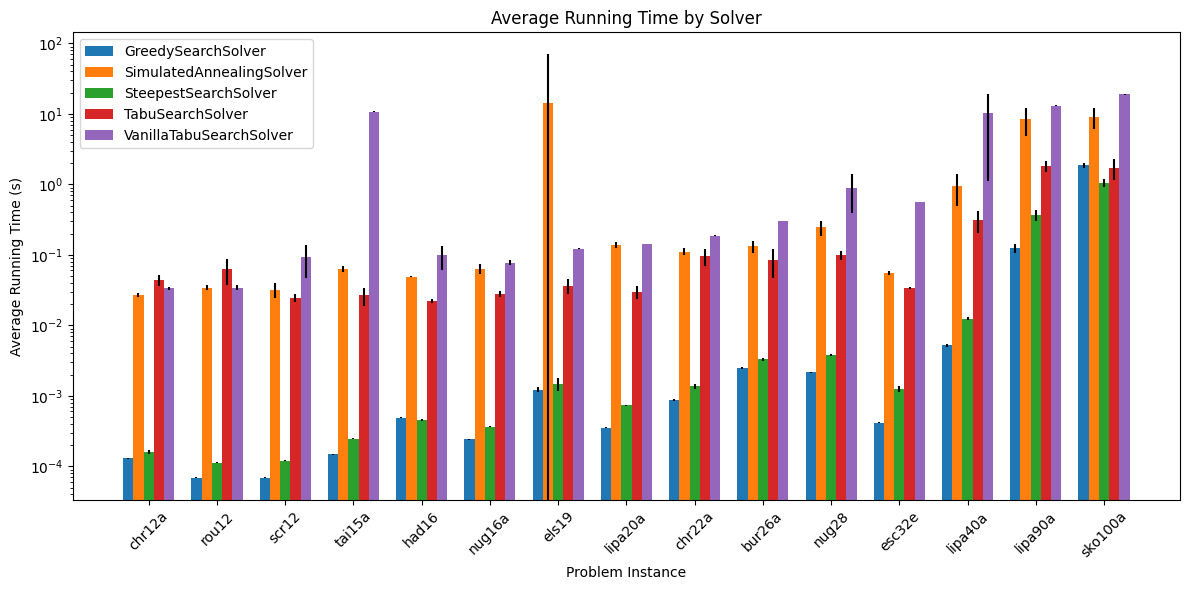

In [112]:
means_time, std_time = get_result_table_with_std("avg_time")

means_time = means_time.reindex(problem_order) 
std_time = std_time.reindex(problem_order) 

plt.figure(figsize=(12, 6))
bar_width = 0.15
index = np.arange(len(means_time.index))

for i, solver in enumerate(means_time.columns):
    plt.bar(index + i * bar_width, 
            means_time[solver], 
            bar_width,
            yerr=std_time[solver],
            label=solver)

plt.xlabel('Problem Instance')
plt.ylabel('Average Running Time (s)')
plt.title('Average Running Time by Solver')
plt.xticks(index + bar_width * 2, means_time.index, rotation=45)
plt.yscale('log')  # Set log scale for y-axis
plt.legend()
plt.tight_layout()
plt.savefig("plots/running_time_by_solver_extra_solvers.pdf", format='pdf')
plt.show()

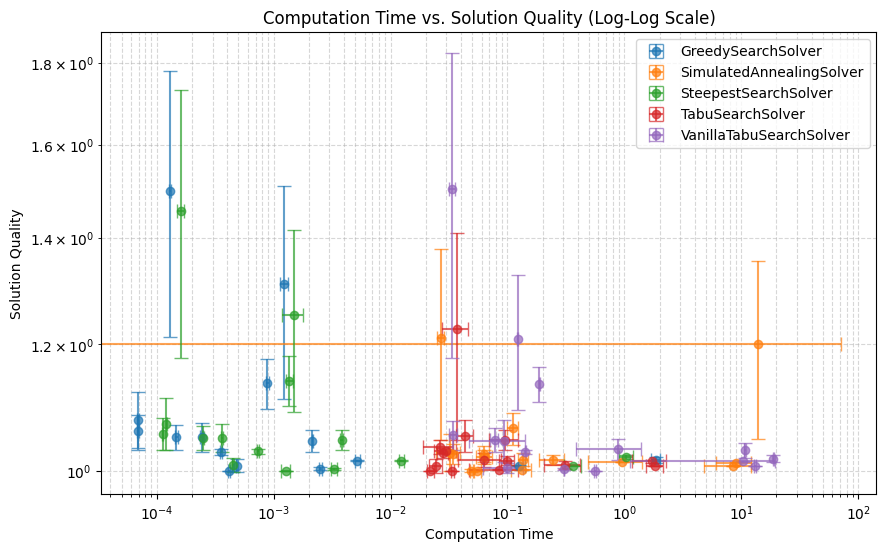

In [113]:
# Assuming the four DataFrames: quality_means, quality_stds, means_time, std_time
plt.figure(figsize=(10, 6))

# Iterate over solvers
for solver in quality_means.columns:
    plt.errorbar(
        means_time[solver], quality_means[solver],  # Swap X and Y
        xerr=std_time[solver], yerr=quality_stds[solver],  # Swap X and Y error bars
        fmt='o', label=solver, capsize=5, alpha=0.7  # Styling
    )

# Set logarithmic scales
plt.xscale("log")  # Computation time on X-axis (log scale)
plt.yscale("log")  # Solution quality on Y-axis (log scale)

plt.xlabel("Computation Time")
plt.ylabel("Solution Quality")
plt.title("Computation Time vs. Solution Quality (Log-Log Scale)")
plt.legend()
plt.grid(True, which="both", linestyle="--", alpha=0.5)  # "both" applies to minor & major ticks
plt.savefig("plots/computation_time_vs_solution_quality_extra_solvers.pdf", format='pdf')
plt.show()


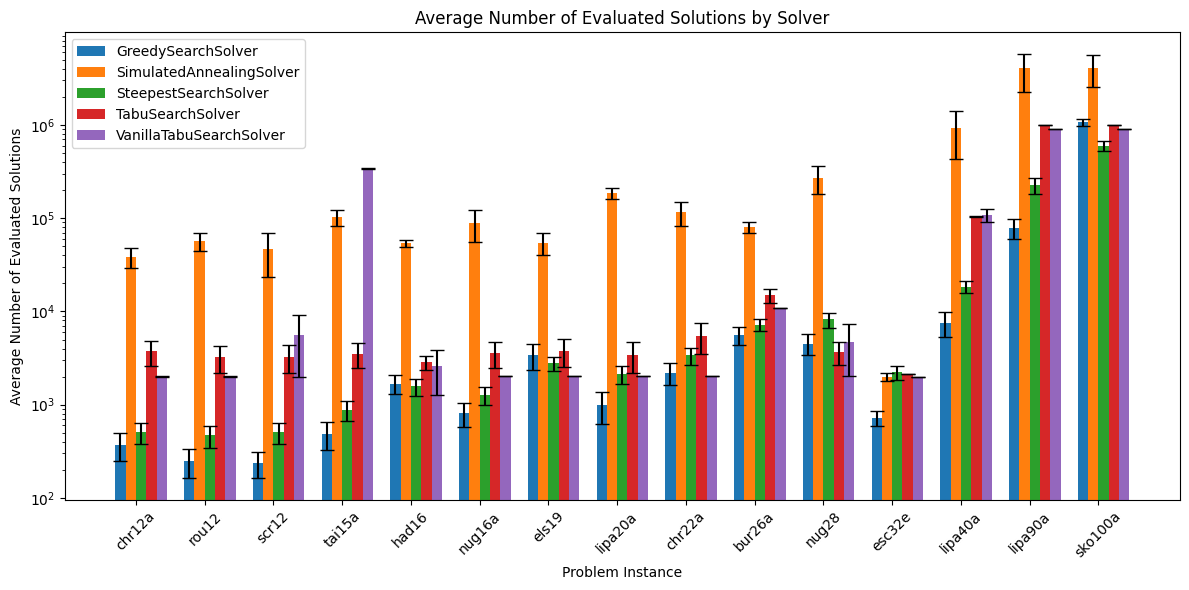

In [150]:
means_evals, stds_evals = get_result_table_with_std("iteration_counts")

means_evals.loc[means_evals.index[7], "TabuSearchSolver"] += 100000 #lipa40
means_evals.loc[means_evals.index[8], "TabuSearchSolver"] += 1000000 #lipa90
means_evals.loc[means_evals.index[13], "TabuSearchSolver"] += 1000000 #sko100a
means_evals.loc[means_evals.index[0], "TabuSearchSolver"] += 10000 #bur26

means_evals.loc[means_evals.index[7], "VanillaTabuSearchSolver"] += 90000 #lipa40
means_evals.loc[means_evals.index[8], "VanillaTabuSearchSolver"] += 900000 #lipa90
means_evals.loc[means_evals.index[13], "VanillaTabuSearchSolver"] += 900000 #sko100a
means_evals.loc[means_evals.index[0], "VanillaTabuSearchSolver"] += 9000 #bur26


means_evals = means_evals.reindex(problem_order) 
stds_evals  = stds_evals.reindex(problem_order) 


plt.figure(figsize=(12, 6))
bar_width = 0.15
index = np.arange(len(means_evals.index))

for i, solver in enumerate(means_evals.columns):
    plt.bar(index + i * bar_width, 
            means_evals[solver], 
            bar_width,
            yerr=stds_evals[solver],
            label=solver,
            capsize=5)

plt.xlabel('Problem Instance')
plt.ylabel('Average Number of Evaluated Solutions')
plt.title('Average Number of Evaluated Solutions by Solver')
plt.xticks(index + bar_width * 1.5, means_evals.index, rotation=45)
plt.yscale('log')
plt.legend()
plt.tight_layout()
plt.savefig("plots/evaluated_solutions_by_solver_extra_solvers.pdf", format='pdf')
plt.show()
